In [177]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [179]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Intern2Grow task 1\dataset.csv")
print('dataset Shape:', df.shape)
df.head()

dataset Shape: (4000, 8)


,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,Monday,large,28,complex,6,49,10,female
1,Saturday,medium,65,simple,2,93,9,female
2,Wednesday,large,96,simple,5,128,8,male
3,Tuesday,medium,155,simple,3,198,6,female
4,Saturday,large,20,simple,2,32,5,male


## 1. Data Preprocessing

In [180]:
df.dtypes

Sold_On              object
Size                 object
Ingredients_Cost      int64
Design_Complexity    object
Time_Taken            int64
Price                 int64
Amount                int64
Gender               object
dtype: object

In [181]:
#check for missing values
df.isnull().sum()/len(df)*100

Sold_On              0.0
Size                 0.0
Ingredients_Cost     0.0
Design_Complexity    0.0
Time_Taken           0.0
Price                0.0
Amount               0.0
Gender               0.0
dtype: float64

### Check for unique values

In [183]:
df['Sold_On'].unique()

array(['Monday', 'Saturday', 'Wednesday', 'Tuesday', 'Sunday', 'Thursday',
       'Friday'], dtype=object)

In [184]:
df['Size'].unique()

array(['large', 'medium', 'small'], dtype=object)

In [185]:
df['Design_Complexity'].unique()

array(['complex', 'simple'], dtype=object)

In [186]:
df['Gender'].unique()

array(['female', 'male'], dtype=object)

### Convert 'Gender' and 'Design_Complexity' to binary 

In [188]:
column_gender = ['Gender']
df[column_gender]=df[column_gender].apply(lambda x: x.map({'female': 1, 'male':0}))

In [189]:
column_design = ['Design_Complexity']
df[column_design]=df[column_design].apply(lambda x: x.map({'complex': 1, 'simple':0}))

In [190]:
df.head()

,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,Monday,large,28,1,6,49,10,1
1,Saturday,medium,65,0,2,93,9,1
2,Wednesday,large,96,0,5,128,8,0
3,Tuesday,medium,155,0,3,198,6,1
4,Saturday,large,20,0,2,32,5,0


In [191]:
# one-hot encode specific columns
df = pd.get_dummies(df, columns=['Sold_On', 'Size'])

In [192]:
df.head()

,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender,Sold_On_Friday,Sold_On_Monday,Sold_On_Saturday,Sold_On_Sunday,Sold_On_Thursday,Sold_On_Tuesday,Sold_On_Wednesday,Size_large,Size_medium,Size_small
0,28,1,6,49,10,1,False,True,False,False,False,False,False,True,False,False
1,65,0,2,93,9,1,False,False,True,False,False,False,False,False,True,False
2,96,0,5,128,8,0,False,False,False,False,False,False,True,True,False,False
3,155,0,3,198,6,1,False,False,False,False,False,True,False,False,True,False
4,20,0,2,32,5,0,False,False,True,False,False,False,False,True,False,False


In [196]:
#convert bool to integer
one_hot_encode = df.select_dtypes(bool)
df[one_hot_encode.columns] = one_hot_encode.astype('int64')

In [197]:
df.head()

,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender,Sold_On_Friday,Sold_On_Monday,Sold_On_Saturday,Sold_On_Sunday,Sold_On_Thursday,Sold_On_Tuesday,Sold_On_Wednesday,Size_large,Size_medium,Size_small
0,28,1,6,49,10,1,0,1,0,0,0,0,0,1,0,0
1,65,0,2,93,9,1,0,0,1,0,0,0,0,0,1,0
2,96,0,5,128,8,0,0,0,0,0,0,0,1,1,0,0
3,155,0,3,198,6,1,0,0,0,0,0,1,0,0,1,0
4,20,0,2,32,5,0,0,0,1,0,0,0,0,1,0,0


In [198]:
#normalize numeric columns using standard scalar
from sklearn.preprocessing import MinMaxScaler

numeric_columns =['Ingredients_Cost','Time_Taken','Amount']
scaler = MinMaxScaler() 
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [199]:
df.head()

,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender,Sold_On_Friday,Sold_On_Monday,Sold_On_Saturday,Sold_On_Sunday,Sold_On_Thursday,Sold_On_Tuesday,Sold_On_Wednesday,Size_large,Size_medium,Size_small
0,0.090,1,0.5,49,1.000000,1,0,1,0,0,0,0,0,1,0,0
1,0.275,0,0.1,93,0.888889,1,0,0,1,0,0,0,0,0,1,0
2,0.430,0,0.4,128,0.777778,0,0,0,0,0,0,0,1,1,0,0
3,0.725,0,0.2,198,0.555556,1,0,0,0,0,0,1,0,0,1,0
4,0.050,0,0.1,32,0.444444,0,0,0,1,0,0,0,0,1,0,0


(array([ 85.,  68., 105.,  79., 106.,  84.,  98.,  70.,  85.,  89.,  77.,
         90.,  67., 101.,  81.,  92.,  96.,  67.,  98.,  81.,  90.,  96.,
         92.,  89.,  91.,  83.,  88.,  80.,  92., 100.,  76., 101.,  95.,
        103.,  88., 100.,  88.,  78., 106.,  86.,  98.,  83.,  97.,  82.,
         99.]),
 array([0.        , 0.02222222, 0.04444444, 0.06666667, 0.08888889,
        0.11111111, 0.13333333, 0.15555556, 0.17777778, 0.2       ,
        0.22222222, 0.24444444, 0.26666667, 0.28888889, 0.31111111,
        0.33333333, 0.35555556, 0.37777778, 0.4       , 0.42222222,
        0.44444444, 0.46666667, 0.48888889, 0.51111111, 0.53333333,
        0.55555556, 0.57777778, 0.6       , 0.62222222, 0.64444444,
        0.66666667, 0.68888889, 0.71111111, 0.73333333, 0.75555556,
        0.77777778, 0.8       , 0.82222222, 0.84444444, 0.86666667,
        0.88888889, 0.91111111, 0.93333333, 0.95555556, 0.97777778,
        1.        ]),
 <BarContainer object of 45 artists>)

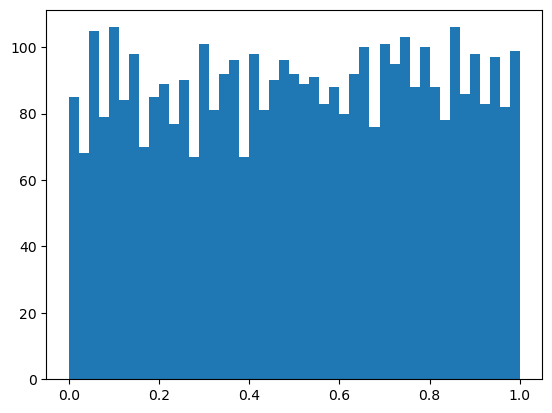

In [200]:
x = df['Ingredients_Cost']
plt.hist(x, bins=45)

## 2. Feature Selection

In [231]:
#  feature
x = df.drop(["Price"], axis=1)
# target
y = df['Price']

## 3. Model Selection and Training

#### Since the target is numerical, I chose the Linear Regression model as it is the simplest model for this dataset

In [259]:
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Fit the model on the training data
lm.fit(x_train, y_train)

# Predict on the test data
y_pred = lm.predict(x_test)

# R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared: ", r_squared)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

R-squared:  0.9739566140915313
RMSE:  11.897196360907893
MAE:  9.744375


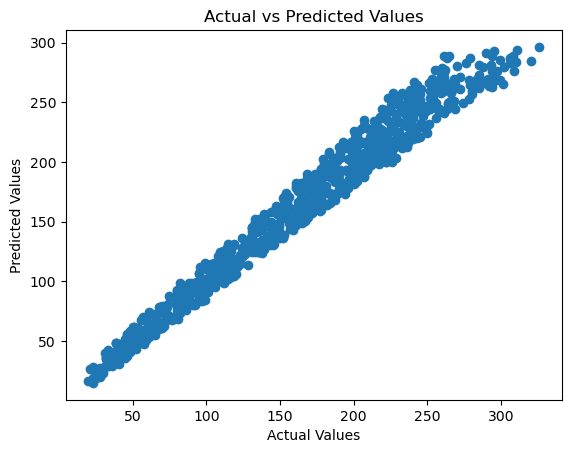

In [261]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


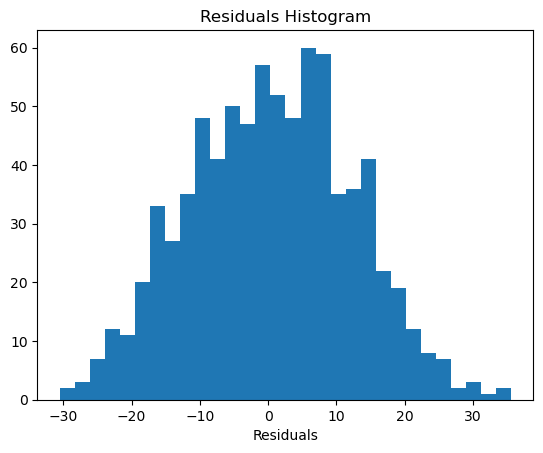

In [263]:
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.title("Residuals Histogram")
plt.show()

In [265]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lm, x, y, cv=5, scoring='r2')
print("Cross-validated R-squared: ", np.mean(cv_scores))

Cross-validated R-squared:  0.9751354933265747
